In [1]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
# 1. 데이터셋 생성
# 학습용과 검증용 분리
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# 데이터 전처리
x_train = x_train.reshape(60000, 784).astype('float32') / 255.0
x_test = x_test.reshape(10000, 784).astype('float32') / 255.0
# 원핫인코딩(one-hot encoding) 처리
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print(y_train[:5])
# 학습용 데이터셋의 일부를 validation set으로 분리
# (train, validation, test)
# 인공신경망의 파라미터를 튜닝하고 학습중지점을 설정하는 용도로 사용
x_val = x_train[:12600]
x_train = x_train[12600:]
y_val = y_train[:12600]
y_train = y_train[12600:]
# 2. 모델 구성
model = Sequential()
#은닉층: 입력노드28*28=784, 출력노드 512, 활성화함수 relu
model.add(Dense(units=512, input_dim=28*28, activation='relu'))
#출력층: 입력노드 512, 출력노드 10, 활성화함수 softmax(다분류)
model.add(Dense(units=10, activation='softmax'))
# 3. 모델 학습과정 설정
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [2]:
# 4. 모델 학습
hist=model.fit(x_train, y_train, epochs=20, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/20
1482/1482 [==============================] - 7s 4ms/step - loss: 0.6644 - accuracy: 0.8404 - val_loss: 0.3814 - val_accuracy: 0.8979
Epoch 2/20
1482/1482 [==============================] - 7s 4ms/step - loss: 0.3477 - accuracy: 0.9046 - val_loss: 0.3133 - val_accuracy: 0.9133
Epoch 3/20
1482/1482 [==============================] - 7s 5ms/step - loss: 0.2975 - accuracy: 0.9174 - val_loss: 0.2756 - val_accuracy: 0.9245
Epoch 4/20
1482/1482 [==============================] - 7s 5ms/step - loss: 0.2669 - accuracy: 0.9249 - val_loss: 0.2543 - val_accuracy: 0.9276
Epoch 5/20
1482/1482 [==============================] - 7s 5ms/step - loss: 0.2439 - accuracy: 0.9329 - val_loss: 0.2389 - val_accuracy: 0.9344
Epoch 6/20
1482/1482 [==============================] - 7s 5ms/step - loss: 0.2248 - accuracy: 0.9382 - val_loss: 0.2198 - val_accuracy: 0.9389
Epoch 7/20
1482/1482 [==============================] - 7s 5ms/step - loss: 0.2087 - accuracy: 0.9429 - val_loss: 0.2069 - val_accuracy:

In [12]:
# 조기 학습 종료 조건 설정
from keras.callbacks import EarlyStopping
# 3회 이상 성능이 개선되지 않으면 학습 종료
early_stopping=EarlyStopping(patience=3)
hist=model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_val, y_val), callbacks=[early_stopping])

Epoch 1/50
1482/1482 [==============================] - 6s 4ms/step - loss: 0.1012 - accuracy: 0.9734 - val_loss: 0.1230 - val_accuracy: 0.9656
Epoch 2/50
1482/1482 [==============================] - 6s 4ms/step - loss: 0.0979 - accuracy: 0.9745 - val_loss: 0.1198 - val_accuracy: 0.9656
Epoch 3/50
1482/1482 [==============================] - 6s 4ms/step - loss: 0.0944 - accuracy: 0.9753 - val_loss: 0.1169 - val_accuracy: 0.9663
Epoch 4/50
1482/1482 [==============================] - 6s 4ms/step - loss: 0.0910 - accuracy: 0.9765 - val_loss: 0.1151 - val_accuracy: 0.9659
Epoch 5/50
1482/1482 [==============================] - 5s 4ms/step - loss: 0.0877 - accuracy: 0.9769 - val_loss: 0.1122 - val_accuracy: 0.9674
Epoch 6/50
1482/1482 [==============================] - 6s 4ms/step - loss: 0.0848 - accuracy: 0.9783 - val_loss: 0.1113 - val_accuracy: 0.9671
Epoch 7/50
1482/1482 [==============================] - 5s 4ms/step - loss: 0.0820 - accuracy: 0.9787 - val_loss: 0.1087 - val_accuracy:

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


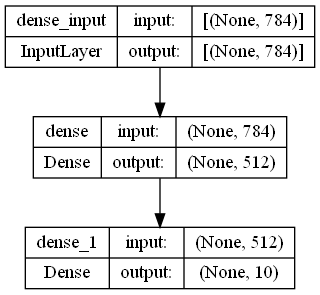

In [5]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [6]:
import numpy as np
# 5. 모델 평가
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32, verbose=0)
print('loss_and_metrics : ' + str(loss_and_metrics))
# 6. 모델 저장(지정한 디렉토리 하위에 assets, variables 디렉토리가 생성됨)
model.save('c:/data/mnist')

loss_and_metrics : [0.11438152194023132, 0.9666000008583069]
INFO:tensorflow:Assets written to: c:/data/mnist\assets


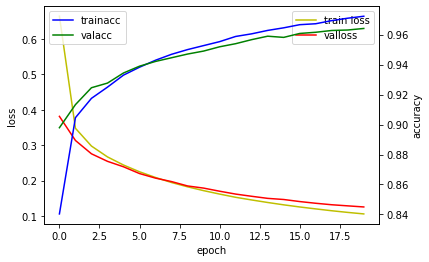

In [7]:
import matplotlib.pyplot as plt
# 5. 모델 학습 과정 표시
fig, loss_ax = plt.subplots()
# 서로 다른 y축을 가진 2개의 x데이터를 사용하여 동일한 플롯에 그래프 출력
acc_ax = loss_ax.twinx() # x축에 2개의 요소 사용
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
# val: validation
loss_ax.plot(hist.history['val_loss'], 'r', label='valloss')
acc_ax.plot(hist.history['accuracy'], 'b', label='trainacc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='valacc')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend()
acc_ax.legend()
plt.show()

In [9]:
from keras.models import load_model
from numpy import argmax
# 전체 샘플 중에서 50개 샘플 선택
xhat_idx=np.random.choice(x_test.shape[0],50)
xhat=x_test[xhat_idx]
# 모형이 저장된 디렉토리 지정
model=load_model('c:/data/mnist') # keras 신경망 모형
yhat=model.predict(xhat)
for i in range(10):
    print(' 실제값:',argmax(y_test[xhat_idx[i]]), ', 예측값:',np.argmax(yhat[i])) 

2/2 [==============================] - 0s 4ms/step
 실제값: 1 , 예측값: 1
 실제값: 5 , 예측값: 5
 실제값: 1 , 예측값: 1
 실제값: 1 , 예측값: 1
 실제값: 3 , 예측값: 3
 실제값: 7 , 예측값: 7
 실제값: 6 , 예측값: 6
 실제값: 1 , 예측값: 1
 실제값: 9 , 예측값: 9
 실제값: 2 , 예측값: 6


In [10]:
yhat[0]

array([6.2302079e-06, 9.9694747e-01, 6.4073171e-04, 2.1876283e-04,
       8.5749678e-05, 4.2011194e-05, 1.0350272e-04, 9.6500368e-04,
       9.2200493e-04, 6.8608766e-05], dtype=float32)

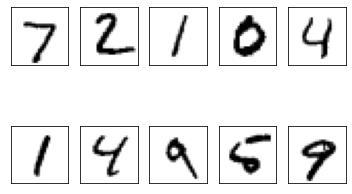

In [11]:
import matplotlib.pyplot as plt
fig=plt.figure()
for i in range(10):
    subplot=fig.add_subplot(2, 5, i+1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.imshow(x_test[i].reshape((28, 28)), cmap=plt.cm.gray_r)
plt.show()